In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
%matplotlib inline

In [41]:
num_ants = 10
num_iterations = 50
alpha = 1 
beta = 2  
evaporation_rate = 0.1

In [42]:
data = pd.read_csv("Data set CSV.csv")

In [43]:
class City:
    def __init__(self, x, y, Name):
        self.x = x
        self.y = y
        self.Name = Name
    def __repr__(self):
        return str(self.Name)

    def distance_function(self, city):
        distance = math.sqrt(((self.x-city.x)**2)+((self.y-city.y)**2))
        return distance
      

In [44]:
city_list = data.values.tolist()
cities_list = [City(city[1], city[2], city[0]) for city in city_list]

In [45]:
def calculate_cost_matrix(cities_list):
    n = len(cities_list)
    distances = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            distances[i][j] = cities_list[i].distance_function(cities_list[j])
    return distances

In [46]:
def tour_cost(tour, cost_matrix):
    total_cost = 0
    for i in range(len(tour)-1):
        total_cost += cost_matrix[tour[i]][tour[i+1]]
    return total_cost

In [47]:
def init_pheromone_matrix(n_cities, cost_matrix):
    avg_cost = np.mean(cost_matrix[cost_matrix>0])
    tao_0 = 1/(n_cities*avg_cost)
    pheromone_matrix = np.full((n_cities, n_cities), tao_0)
    np.fill_diagonal(pheromone_matrix, 0)
    return pheromone_matrix

In [48]:
def update_pheromone(pheromone_matrix, ants, evaporation_rate):
    n_cities = len(pheromone_matrix)
    pheromone_matrix *= (1-evaporation_rate)
    for ant in ants:
        pheromone_deposit = 1/ant.tour_length
        for j in range(len(ant.tour)-1):
            city1, city2 = ant.tour[j], ant.tour[j+1]
            pheromone_matrix[city1][city2] += pheromone_deposit
            pheromone_matrix[city2][city1] += pheromone_deposit
    return pheromone_matrix

In [49]:
class Ant:
    def __init__(self, start_city, city_number):
        self.start_city = start_city
        self.current_city = start_city
        self.visited = set([start_city])
        self.tour = [start_city]
        self.tour_length = 0
        
    def next_city(self, pheromone_matrix, cost_matrix, alpha, beta):
        n = len(cost_matrix)
        not_visited = [city for city in range(n) if city not in self.visited]
        if not not_visited:
            return None
        pheromone = pheromone_matrix[self.current_city][not_visited]
        dist_inv = 1/cost_matrix[self.current_city][not_visited]
        prob = (pheromone**alpha)*(dist_inv**beta)
        prob = prob/np.sum(prob)
        next_city = np.random.choice(not_visited, p=prob)
        return next_city
    def move(self, next_city, cost_matrix):
        self.tour.append(next_city)
        self.visited.add(next_city)
        self.tour_length += cost_matrix[self.current_city][next_city]
        self.current_city = next_city
    def complete_tour(self, cost_matrix):
        self.tour.append(self.start_city)
        self.tour_length += cost_matrix[self.current_city][self.start_city]
        

In [50]:
def ant_colony_algorithm(cost_matrix, n_ants, iterations, alpha, beta, evaporation_rate):
    test_cost_matrix = cost_matrix
    n_cities = len(test_cost_matrix)
    pheromone_matrix = init_pheromone_matrix(n_cities, test_cost_matrix)
    best_tour = None
    best_cost = float('inf')
    for iteration in range(iterations):
        ants = [Ant(start_city=np.random.randint(n_cities), city_number= n_cities)for j in range(n_ants)]
        for ant in ants:
            while len(ant.visited) < n_cities:
                next_city = ant.next_city(pheromone_matrix, test_cost_matrix, alpha, beta)
                ant.move(next_city, test_cost_matrix)
            ant.complete_tour(test_cost_matrix)
            if ant.tour_length < best_cost:
                best_tour = ant.tour
                best_cost = ant.tour_length
        pheromone_matrix = update_pheromone(pheromone_matrix, ants, evaporation_rate)
        print(f"Iteration {iteration + 1}: Best cost so far = {best_cost}")
    return best_tour, best_cost

In [51]:
best_tour, best_cost = ant_colony_algorithm(cost_matrix, num_ants, num_iterations, alpha, beta, evaporation_rate)

print("\nBest tour found:", best_tour)
print("Best tour cost:", best_cost)

Iteration 1: Best cost so far = 430.7273197055678
Iteration 2: Best cost so far = 346.9945918038028
Iteration 3: Best cost so far = 342.4275748605587
Iteration 4: Best cost so far = 329.15404142878043
Iteration 5: Best cost so far = 308.9364634236407
Iteration 6: Best cost so far = 299.960046306089
Iteration 7: Best cost so far = 299.960046306089
Iteration 8: Best cost so far = 299.960046306089
Iteration 9: Best cost so far = 299.960046306089
Iteration 10: Best cost so far = 289.4091744568742
Iteration 11: Best cost so far = 289.4091744568742
Iteration 12: Best cost so far = 289.4091744568742
Iteration 13: Best cost so far = 289.4091744568742
Iteration 14: Best cost so far = 289.4091744568742
Iteration 15: Best cost so far = 289.4091744568742
Iteration 16: Best cost so far = 289.4091744568742
Iteration 17: Best cost so far = 284.3810904080332
Iteration 18: Best cost so far = 284.3810904080332
Iteration 19: Best cost so far = 284.3810904080332
Iteration 20: Best cost so far = 284.381090

In [54]:
def plot_best_tour(best_tour, cities_list):
    x_coords = [cities_list[i].x for i in best_tour]
    y_coords = [cities_list[i].y for i in best_tour]
    plt.figure(figsize=(8, 6))
    plt.plot(x_coords, y_coords, marker='o')
    plt.scatter(x_coords, y_coords)
    plt.grid()
    plt.show()


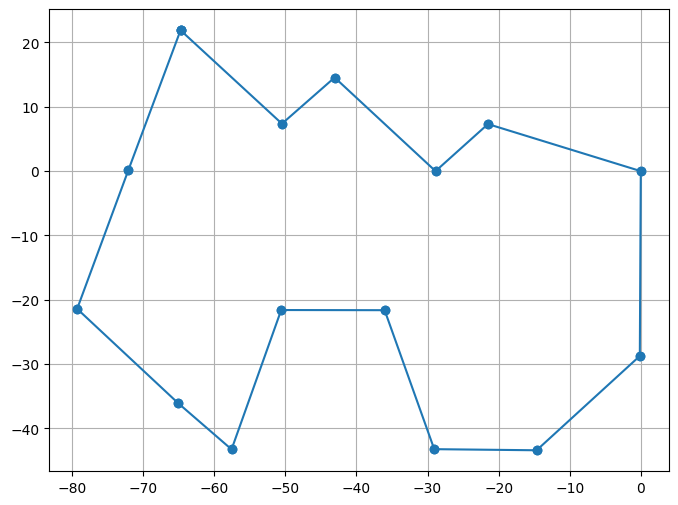

In [55]:
plot_best_tour(best_tour, cities_list)